<a href="https://colab.research.google.com/github/kmkarakaya/Deep-Learning-Tutorials/blob/master/Text_Vectorization_Use_Save_Upload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KERAS TEXT VECTORIZATION LAYER: USE, SAVE, LOAD, AND DEPLOY

**Author:** [Murat Karakaya](https://www.linkedin.com/in/muratkarakaya/)<br>
**Date created:** 05 Oct 2021<br>
**Last modified:** 18 March 2023<br>
**Description:** This is a new part of the "**[tf.keras.layers: Understand & Use](https://www.youtube.com/playlist?list=PLQflnv_s49v_7WIgOo9mVKptLZHyOYysD)**" / "[**tf.keras.layers: Anla ve Kullan**](https://www.youtube.com/playlist?list=PLQflnv_s49v9h85zD1_GDfTxZOrCWTDhp)" series. In this part, we will build, adapt, use, save, and upload the Keras TextVectorization layer. 

We will download a [Kaggle Dataset](https://www.kaggle.com/savasy/multiclass-classification-data-for-turkish-tc32?select=ticaret-yorum.csv) in which there are 32 topics and more than 400K total reviews. 
In this tutorial, we will use this dataset for a multi class text classification task.

Our **main aim** is to learn how to efectively use the Keras `TextVectorization` layer in practice.

The tutorial has 5 parts:

* **PART A: BACKGROUND**
* **PART B: KNOW THE DATA**
* **PART C: USE KERAS TEXT VECTORIZATION LAYER**
* **PART D: BUILD AN END-TO-END MODEL**
* **PART E: DEPLOY THE END-TO-END MODEL**
* **PART F: SUMMARY**


At the end of this tutorial, we will cover:
* What a Keras `TextVectorization` layer is
* Why we need to use a Keras `TextVectorization` layer in Natural Languge Processing (NLP) tasks
* How to employ a Keras `TextVectorization` layer in **Text Preprocessing**
* How to integrate a Keras `TextVectorization` layer to a trained model
* How to save and upload a Keras `TextVectorization` layer and a model with a Keras `TextVectorization` layer
* How to integrate a Keras `TextVectorization` layer with **TensorFlow Data Pipeline** API (`tf.data`)
* How to design, train, save, and load an End-to-End model using Keras `TextVectorization` layer
* How to deploy the End-to-End model with a Keras `TextVectorization` layer implemented with a custom standardize (`custom_standardization`) function. 
In deployment, I will use the `Gradio` library and the `HuggingFace Spaces`.

**Accessible on:**
* [YouTube in English](https://youtube.com/playlist?list=PLQflnv_s49v8Eo2idw9Ju5Qq3JTEF-OFW)
* [YouTube in Turkish](https://youtube.com/playlist?list=PLQflnv_s49v8-xeTLx1QmuE-YkRB4bToF)
* [Medium](https://kmkarakaya.medium.com/text-vectorization-use-save-upload-54d65945d222)
* [Github pages](https://kmkarakaya.github.io/Deep-Learning-Tutorials/)
* [Github Repo](https://github.com/kmkarakaya/Deep-Learning-Tutorials)
* [Google Colab](https://colab.research.google.com/drive/1_hiUXcX6DwGEsPP2iE7i-HAs-5HqQrSe?usp=sharing)



# REFERENCES
* [Keras Preprocessing layers by Keras.io](https://keras.io/api/layers/preprocessing_layers/)
* [Text classification from scratch by Keras.io](https://keras.io/examples/nlp/text_classification_from_scratch/)
* [TextVectorization layer by Keras.io](https://keras.io/api/layers/preprocessing_layers/text/text_vectorization/)

# **PART A: BACKGROUND**

# 1 TERMS & CONCEPTS

## 1.1 What is Text Vectorization?

Text Vectorization is the process of converting text into numerical representation. 

There are many different techniques proposed to convert text to a numerical form such as:
* One-hot Encoding (OHE)
* Count Vectorizer
* Bag-of-Words (BOW)
* N-grams
* Term Frequency
* Term Frequency-Inverse Document Frequency (TF-IDF)
* Embeddings



## 1.2. What is Text Preprocessing?
Text preprocessing is traditionally an important step for natural language processing (NLP) tasks. It transforms text into a more suitable form so that Machine Learning or Deep Learning algorithms can perform better.

The main phases of Text preprocessing:
* **Noise Removal** (cleaning) – Removing unnecessary characters and formatting
* **Tokenization** – break multi-word strings into smaller components
* **Normalization** – a catch-all term for processing data; this includes stemming and lemmatization


Some of the common **Noise Removal** (cleaning) steps are:

* Removal of Punctuations
* Removal of Frequent words
* Removal of Rare words
* Removal of emojis
* Removal of emoticons
* Conversion of emoticons to words
* Conversion of emojis to words
* Removal of URLs
* Removal of HTML tags
* Chat words conversion
* Spelling correction

**Tokenization** is about splitting strings of text into smaller pieces, or “tokens”. Paragraphs can be tokenized into sentences and sentences can be tokenized into words. 


**Noise Removal** and **Tokenization** and  are staples of almost all text pre-processing pipelines. However, some data may require further processing through text **normalization**. Some of the common **normalization** steps are:
* Upper or lowercasing
* Stopword removal
* Stemming – bluntly removing prefixes and suffixes from a word
* Lemmatization – replacing a single-word token with its root



## 1.3. What is Keras Text Vectorization layer?
 

`tf.keras.layers.TextVectorization` layer is one of the [Keras Preprocessing layers](https://keras.io/guides/preprocessing_layers/). 

We can preproces the input by using different libraries such as Python String library, or SciKit Learn library, etc. 

However, there are very important advantages using the [Keras Preprocessing layers](https://keras.io/guides/preprocessing_layers/):

* You can build **Keras-native** input processing **pipelines**. These input processing pipelines can be used as **independent** preprocessing code in **non-Keras workflows**, combined directly with Keras models, and exported as part of a Keras SavedModel.

* You can build and **export** models that are **truly end-to-end**: models that accept **raw data** (images or raw structured data) as input; models that handle feature **normalization** or feature value **indexing** on their own.

Today, we will deal with the `tf.keras.layers.TextVectorization` layer which:
* turns ***raw strings*** into an **encoded representation** 
* that representation can be read by an `Embedding` layer or `Dense` layer.

That is, the `tf.keras.layers.TextVectorization` layer can be used in 
* **Text Preprocessing** and
* **Text Vectorization**

# 2. IMPORT LIBRARIES

**IMPORTANT:** When I prepared this tutorial on 05 Oct 2021, the current version (2.6.0) of TF and Keras generate some **errors** in saving and uploading the **tf.keras.layers.TextVectorization layer**. 

However, the nightly version has no problem handling these operations.

For more information about the bug, please see [here](https://github.com/keras-team/keras/issues/15443#issuecomment-938211510)



```python
import tensorflow as tf

from tensorflow import keras

print("tf version:",tf.__version__)

print("keras version:", keras.__version__)

tf version: 2.6.0

keras version: 2.6.0
```

Therefore, below I first upload the TF nightly version. 

```python
tf version: 2.8.0-dev20211005
keras version: 2.7.0
```

In [ ]:
pip install tf-nightly --quiet --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 595.8/595.8 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.9/440.9 KB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 KB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 80.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.22.1 which is incompatible.
tensorflow-metadata 1.12.0 requires protobuf<4,>=3.13, but you have protobuf 4.22.1 which is incompatible.
tensorboard 2.11.2 requires protobuf<4,>=3.9.2, but you 

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import TextVectorization
import re
import string
import random
from sklearn.model_selection import train_test_split

In [ ]:
print("tf version:",tf.__version__)
print("keras version:", keras.__version__)

tf version: 2.11.0
keras version: 2.11.0


In [ ]:
#@title Record Each Cell's Execution Time
!pip install ipython-autotime

%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.5 MB/s eta 0:00:00
time: 541 µs (started: 2023-03-17 14:23:13 +00:00)


# 3. DOWNLOAD A KAGGLE DATASET INTO GOOGLE COLAB

The [Multi Class Classification Dataset for Turkish](https://www.kaggle.com/savasy/multiclass-classification-data-for-turkish-tc32?select=ticaret-yorum.csv) is a **benchmark dataset for Turkish** **text classification** task. 

It contians 430K comments/reviews for a total 32 categories products or services.

Each category roughly has 13K comments.

A baseline algoritm, Naive Bayes, gets %84 F1 score.




[My blog post explaning how to download Kaggle Datasets is here.](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)

My video tutorial explaning how to download Kaggle Datasets is here: [Turkish](https://youtu.be/ls47CPFU1vE)/[English](https://youtu.be/_rlt4mzLDLc)



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
time: 3.65 s (started: 2023-03-17 14:23:13 +00:00)


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Colab Notebooks/input"

time: 629 µs (started: 2023-03-17 14:23:17 +00:00)


In [ ]:
#changing the working directory
%cd "/content/gdrive/MyDrive/Colab Notebooks/input"


/content/gdrive/MyDrive/Colab Notebooks/input
time: 3.33 ms (started: 2023-03-17 14:23:17 +00:00)


In [ ]:
#get the api command from kaggle dataset page
#!kaggle datasets download -d savasy/multiclass-classification-data-for-turkish-tc32

time: 267 µs (started: 2023-03-17 14:23:17 +00:00)


In [ ]:
# check the downloaded zip file
!ls 

120001_PH1.csv	    flagged			model.png
320d.csv	    generatedReviews.csv	runs
bert_model	    generatedReviews_final.csv	ticaret-yorum.csv
cache_dir	    generatedReviews_plus.csv	tr_stop_word.txt
category_to_id.pkl  id_to_category.pkl		vocabPickle
category_to_id.txt  id_to_category.txt
corona.csv	    kaggle.json
time: 122 ms (started: 2023-03-17 14:23:17 +00:00)


In [ ]:
# unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.
time: 132 ms (started: 2023-03-17 14:23:17 +00:00)


In [ ]:
# check the downloaded csv file
!ls 

120001_PH1.csv	    flagged			model.png
320d.csv	    generatedReviews.csv	runs
bert_model	    generatedReviews_final.csv	ticaret-yorum.csv
cache_dir	    generatedReviews_plus.csv	tr_stop_word.txt
category_to_id.pkl  id_to_category.pkl		vocabPickle
category_to_id.txt  id_to_category.txt
corona.csv	    kaggle.json
time: 125 ms (started: 2023-03-17 14:23:17 +00:00)


# 4. LOAD STOP WORDS IN TURKISH

As you might know "**Stop words**" are a set of commonly used words in a language. Examples of stop words in **English** are “a”, “the”, “is”, “are” and etc. Stop words are commonly used in Text Mining and Natural Language Processing (NLP) to **eliminate** words that are so commonly used that they carry **very little useful information**.

I begin with uploading an existing  list of stop words in Turkish below:

In [ ]:
tr_stop_words = pd.read_csv('tr_stop_word.txt',header=None)
for each in tr_stop_words.values[:5]:
  print(each[0])

ama
amma
anca
ancak
bu
time: 981 ms (started: 2023-03-17 14:23:17 +00:00)


# 5. LOAD THE DATASET
After downloading the dataset from Kaggle website, we can upload it by using the Pandas library `read_csv()` function:

In [ ]:
data = pd.read_csv('ticaret-yorum.csv')
pd.set_option('max_colwidth', 400)

time: 5.24 s (started: 2023-03-17 14:23:18 +00:00)


# **PART B: KNOW THE DATA**

# 6. EXPLORE THE DATASET

Before getting into the details of how to use the `tf.keras.layers.TextVectorization` layer, let me introduce the dataset briefly.

## Shuffle Data

It is a really good and useful habit that, before doing anything else, as a first step in the preprocessing shuffle the data!

Actually, I will shuffle the data at the last step of the pipeline.
But it does not hurt shuffling it twice :))


In [ ]:
data= data.sample(frac=1)

time: 189 ms (started: 2023-03-17 14:23:23 +00:00)


## Summary Information about the dataset

Get the initial information about the dataset:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431306 entries, 37769 to 33235
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   category  431306 non-null  object
 1   text      431306 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB
time: 346 ms (started: 2023-03-17 14:23:24 +00:00)


We have a total of **431306** of rows and **2** columns: ***category*** & ***text***.

According to `data.info()`, there is **no null values** in the dataset. If there are any null values in the dataset, we could drop these null values as follows:
```python
df.dropna(inplace=True)

df.isnull().sum()
```

## Sample Reviews and their categories:

In [ ]:
data.head()

,category,text
37769,beyaz-esya,"Bosch Servisinin Mağdur Etmesi,2 yıl önce aldığım bulaşık makinesi daha birinci haftada arıza verdi defalarca servis geldi servisleri gezmeye gelir gibi bakıp bir şey yok deyip gidiyorlar üstelikte şikayet ettiğinizde 4446333 bu numarayı veriyorlar onlarda suç sizde deyip dosyayı kapatıyorlar! Ürünlerinin arkasında durmuyor bunda...Devamını oku"
364875,sigortacilik,"Sigortam.net Satışını Yaptığım Aracın İptal Ve İadesi,""Araştırmalarım sonucunda Sigortam.net aracılığı ile zorunlu trafik sigortamı yaptırmaya karar verdim."
34197,beyaz-esya,"Arçelik Bulaşık Makinesi Ürünün İç Metal Kısmı ve Kapak Metali Kireç Lekeli ve Pis,Bundan 1 sene önce Arçelik'ten 4 programlı bulaşık makinesi aldım ürünün iç metal kısmı ve kapak metali kireç lekeli ve pis defalarca servis geldi kapağın metali değiştirdi ürün yine aynı oldu servise götürüp 12 gün sonra test edip tekrar getirdiler üstelik kapağında çizikle ürün geldiğinden beri da...Devamını oku"
163888,giyim,"Dalkılıç Spor Ücret İadesi Yapılmıyor,Bu siteden esofman altı aldım fakat bedeni olmadığı için daha küçük beden için değişim istedim. Firmadan aradılar ürünün bedeninin kalmadığını söylediler bende ücret iadesi istediğimi söyledim tamam diyerek 10 is günü içerisinde yatacağını söylediler. Üzerinden 1 aydan fazla geçti ne telefonlarıma g...Devamını oku"
66724,cep-telefon-kategori,"İPhone Servis Kusurlu Ürüne Çözüm Bulmuyor!,""TS2020-00182309 fiş no. Servis bakım raporu."


time: 16 ms (started: 2023-03-17 14:23:24 +00:00)


# 7. CREATE A TENSORFLOW DATA PIPELINE FOR TEXT PREPROCESSING &  VECTORIZATION

So far, we just observe some properties of the **raw data**.
Using these observations, we are ready to preprocess the `text` data for a classifier model.

Below, we will begin to create a **TensorFlow data pipeline** which includes **Keras Text Vectorization layer** for preprocessing the data and preparing it for a classifier.

A pipeline for a text model mostly involves extracting symbols from raw text data, converting them to embedding identifiers with a lookup table, and batching together sequences of different lengths.

In this tutorial, I will use the TensorFlow "**tf.data**" API. If you are not familiar with TF data pipeline "**tf.data**" API, you can apply below resources:
* Official TensorFlow blog: [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data) 
* The Murat Karakaya Akademi YouTube playlist in Turkish: [tf.data: TensorFlow Data Pipeline Anlamak ve Kullanmak](https://www.youtube.com/playlist?list=PLQflnv_s49v8l8dYU01150vcoAn4sWSAm)  
* The Murat Karakaya Akademi YouTube playlist in English:[TensorFlow Data Pipeline: How to Design Code Use TensorFlow Data Pipelines with Python & Keras](https://www.youtube.com/playlist?list=PLQflnv_s49v_m6KLMsORgs9hVIvDCwDAb)
* The Murat Karakaya Akademi Medium blog: [tf.data: Tensorflow Data Pipelines](https://medium.com/deep-learning-with-keras/tf-data-tensorflow-data-pipelines-71915155bdf2)


## Convert Categories From Strings to Integer Ids

Observe that the categories (topics/class)of the reviews are **strings**:

In [ ]:
data["category"]

37769               beyaz-esya
364875            sigortacilik
34197               beyaz-esya
163888                   giyim
66724     cep-telefon-kategori
                  ...         
160759                   giyim
99370          emlak-ve-insaat
89205               elektronik
42877               bilgisayar
33235               beyaz-esya
Name: category, Length: 431306, dtype: object

time: 6.03 ms (started: 2023-03-17 14:23:24 +00:00)


We nned to create **integer** category **ids** from **string** category **names** by adding a new column to the dataframe "**category_id**":

In [ ]:
data["category"] = data["category"].astype('category')
data["category_id"] = data["category"].cat.codes
data.head()

,category,text,category_id
37769,beyaz-esya,"Bosch Servisinin Mağdur Etmesi,2 yıl önce aldığım bulaşık makinesi daha birinci haftada arıza verdi defalarca servis geldi servisleri gezmeye gelir gibi bakıp bir şey yok deyip gidiyorlar üstelikte şikayet ettiğinizde 4446333 bu numarayı veriyorlar onlarda suç sizde deyip dosyayı kapatıyorlar! Ürünlerinin arkasında durmuyor bunda...Devamını oku",2
364875,sigortacilik,"Sigortam.net Satışını Yaptığım Aracın İptal Ve İadesi,""Araştırmalarım sonucunda Sigortam.net aracılığı ile zorunlu trafik sigortamı yaptırmaya karar verdim.",27
34197,beyaz-esya,"Arçelik Bulaşık Makinesi Ürünün İç Metal Kısmı ve Kapak Metali Kireç Lekeli ve Pis,Bundan 1 sene önce Arçelik'ten 4 programlı bulaşık makinesi aldım ürünün iç metal kısmı ve kapak metali kireç lekeli ve pis defalarca servis geldi kapağın metali değiştirdi ürün yine aynı oldu servise götürüp 12 gün sonra test edip tekrar getirdiler üstelik kapağında çizikle ürün geldiğinden beri da...Devamını oku",2
163888,giyim,"Dalkılıç Spor Ücret İadesi Yapılmıyor,Bu siteden esofman altı aldım fakat bedeni olmadığı için daha küçük beden için değişim istedim. Firmadan aradılar ürünün bedeninin kalmadığını söylediler bende ücret iadesi istediğimi söyledim tamam diyerek 10 is günü içerisinde yatacağını söylediler. Üzerinden 1 aydan fazla geçti ne telefonlarıma g...Devamını oku",12
66724,cep-telefon-kategori,"İPhone Servis Kusurlu Ürüne Çözüm Bulmuyor!,""TS2020-00182309 fiş no. Servis bakım raporu.",4


time: 90.8 ms (started: 2023-03-17 14:23:24 +00:00)


Lastly, we can check the number of categories. Note that it should be **32**: 

In [ ]:
data['category']

37769               beyaz-esya
364875            sigortacilik
34197               beyaz-esya
163888                   giyim
66724     cep-telefon-kategori
                  ...         
160759                   giyim
99370          emlak-ve-insaat
89205               elektronik
42877               bilgisayar
33235               beyaz-esya
Name: category, Length: 431306, dtype: category
Categories (32, object): ['alisveris', 'anne-bebek', 'beyaz-esya', 'bilgisayar', ..., 'spor',
                          'temizlik', 'turizm', 'ulasim']

time: 7.5 ms (started: 2023-03-17 14:23:24 +00:00)


## Build a Dictionary for id to text category (topic) look-up:

In [ ]:
id_to_category = pd.Series(data.category.values,index=data.category_id).to_dict()
id_to_category

{2: 'beyaz-esya',
 27: 'sigortacilik',
 12: 'giyim',
 4: 'cep-telefon-kategori',
 26: 'saglik',
 22: 'mobilya-ev-tekstili',
 10: 'finans',
 24: 'mutfak-arac-gerec',
 20: 'medya',
 29: 'temizlik',
 19: 'kucuk-ev-aletleri',
 21: 'mekan-ve-eglence',
 18: 'kisisel-bakim-ve-kozmetik',
 23: 'mucevher-saat-gozluk',
 28: 'spor',
 17: 'kargo-nakliyat',
 13: 'hizmet-sektoru',
 1: 'anne-bebek',
 0: 'alisveris',
 5: 'egitim',
 9: 'etkinlik-ve-organizasyon',
 30: 'turizm',
 8: 'enerji',
 3: 'bilgisayar',
 7: 'emlak-ve-insaat',
 31: 'ulasim',
 16: 'kamu-hizmetleri',
 6: 'elektronik',
 11: 'gida',
 14: 'icecek',
 25: 'otomotiv',
 15: 'internet'}

time: 520 ms (started: 2023-03-17 14:23:24 +00:00)


In [ ]:
pwd

'/content/gdrive/MyDrive/Colab Notebooks/input'

time: 2.38 ms (started: 2023-03-17 14:23:25 +00:00)


In [ ]:
import pickle
pkl_file = open("id_to_category.pkl", "wb")
pickle.dump(id_to_category, pkl_file)
pkl_file.close()

pkl_file = open("id_to_category.pkl", "rb")
uploaded_id_to_category = pickle.load(pkl_file)
print(uploaded_id_to_category)

{2: 'beyaz-esya', 27: 'sigortacilik', 12: 'giyim', 4: 'cep-telefon-kategori', 26: 'saglik', 22: 'mobilya-ev-tekstili', 10: 'finans', 24: 'mutfak-arac-gerec', 20: 'medya', 29: 'temizlik', 19: 'kucuk-ev-aletleri', 21: 'mekan-ve-eglence', 18: 'kisisel-bakim-ve-kozmetik', 23: 'mucevher-saat-gozluk', 28: 'spor', 17: 'kargo-nakliyat', 13: 'hizmet-sektoru', 1: 'anne-bebek', 0: 'alisveris', 5: 'egitim', 9: 'etkinlik-ve-organizasyon', 30: 'turizm', 8: 'enerji', 3: 'bilgisayar', 7: 'emlak-ve-insaat', 31: 'ulasim', 16: 'kamu-hizmetleri', 6: 'elektronik', 11: 'gida', 14: 'icecek', 25: 'otomotiv', 15: 'internet'}
time: 12.3 ms (started: 2023-03-17 14:23:25 +00:00)


## Reduce the Size of the Dataset

Since using a large dataset for **testing** your pipeline would take more time, you would prefer **take a portion** of the raw dataset as below:

In [ ]:
#limit the number of samples to be used in testing the pipeline
#data_size= 1000 #instead of 431306 
#data= data[:data_size]
#data.info()

time: 295 µs (started: 2023-03-17 14:23:25 +00:00)


## Split the Raw Dataset into Train and Test Datasets

To prevent **data leakage** during preprocessing the text data, we need to split the text int Train and Test data sets. 

**Data leakage** refers to a mistake make by the creator of a machine learning model in which they accidentally share information between the test and training data-sets. Typically, when splitting a data-set into testing and training sets, the goal is to ensure that no data is shared between the two. This is because the test set’s purpose is to simulate real-world, unseen data. However, when evaluating a model, we do have full access to both our train and test sets, so it is up to us to ensure that no data in the training set is present in the test set.

In our case, since we want to classify reviews, we have **not to use** test reviews in **text vectorization**.

In [ ]:
# save features and targets from the 'data'
features, targets = data['text'], data['category_id']

train_features, test_features, train_targets, test_targets = train_test_split(
        features, targets,
        train_size=0.8,
        test_size=0.2,
        random_state=42,
        shuffle = True,
        stratify=targets
    )

time: 295 ms (started: 2023-03-17 14:23:25 +00:00)


# Build the Train & Test TensorFlow Datasets

First, we create **TensorFlow Datasets** from the raw Train Dataframe for further processing.

Note that:
1. **X**: input (text/reviews)
2. **y**: target value (categories/topics/class)

**Observe that** we have **reviews in text** as input and **categories (topics) in integer** as target values:

In [ ]:
train_features.values[:5]

array(['Eti Crax Mısırlı Krakerin İçinden Ne Olduğu Belirsiz Bir Şey Çıktı!,Kantinden almış olduğum Eti Crax Mısırlı krakerin içinden ne olduğunu anlamadığımız bir şey çıktı. Ne olduğunu firma açıklamadığı sürece ve bu sorun devam ettikçe firma hakkında gerekli tüm işlemleri başlatacağım.Devamını oku',
       'Snopy Rampage Ses Gelmiyor,Snopy Rampage Kulaklıktan ses gelmiyor hem bilgisayarda hem telefonda anlamak gitti. Yeşil ucu taktım olmadı kırmızıyı taktım olmadı.Devamını oku',
       'Medical Park Hastanesi Online Doktor Randevusu Ve Ücret İadesi!,02.04.2020 tarihi için çağrı merkezi üzerinden Romatoloji bölümünden online doktor randevusu aldım. Ne arandım ne de bilgilendirme yaptılar. Müsait değilse neden randevu verip ücretini de ışık hızında alıyorlar? 300 TL ödedim. Ücretimin iadesini ivedilikle istiyorum.Devamını oku',
       'Netflix Dizinin Gösterimden Kaldırılması Talebi,"24 Nisan\'da yayınlanması düşünülen başrolü osman olan LGBT dizinin aile yapısını bozacağı, gençlerimi

time: 4.98 ms (started: 2023-03-17 14:23:25 +00:00)


In [ ]:
train_targets.values[:5]

array([11,  6, 26, 20, 19], dtype=int8)

time: 3.16 ms (started: 2023-03-17 14:23:25 +00:00)


## Prepare TensorFlow Datasets

We convert the data stored in Pandas Data Frame into  a data stored in TensorFlow Data Set as below:

In [ ]:
# train X & y
train_text_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(train_features.values, tf.string)
) 
train_cat_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(train_targets.values, tf.int64),

) 
# test X & y
test_text_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(test_features.values, tf.string)
) 
test_cat_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(test_targets.values, tf.int64),

) 

time: 4.75 s (started: 2023-03-17 14:23:25 +00:00)


## Decide the dictionary size and the review size

For preprocessing the text, we need to decide the **dictionary (vocabulary) size** and the **review (text) length**.


In [ ]:
vocab_size = 20000  # Only consider the top 20K words
max_len = 50  # Maximum review (text) size in words

time: 1.93 ms (started: 2023-03-17 14:23:30 +00:00)


# **PART C: USE KERAS TEXT VECTORIZATION LAYER**

# 8. PREPROCESS THE TEXT WITH THE KERAS `TEXTVECTORIZATION` LAYER



## 8.1. Define your own `custom_standardization` function
First, I define a function which will preprocess the given text.
The `custom_standardization` function will convert the given string to a standart form by transforming the input applying several updates:
* convert all characters to lowercase
* remove special symbols, extra spaces, html tags, digits, and puctuations
* remove stop wrods
* replace the special Turkish letters with the corresponding English letters.

In [ ]:
@tf.keras.utils.register_keras_serializable()
def custom_standardization(input_string):
    """ Remove html line-break tags and handle punctuation """
    no_uppercased = tf.strings.lower(input_string, encoding='utf-8')
    no_stars = tf.strings.regex_replace(no_uppercased, "\*", " ")
    no_repeats = tf.strings.regex_replace(no_stars, "devamını oku", "")    
    no_html = tf.strings.regex_replace(no_repeats, "<br />", "")
    no_digits = tf.strings.regex_replace(no_html, "\w*\d\w*","")
    no_punctuations = tf.strings.regex_replace(no_digits, f"([{string.punctuation}])", r" ")
    #remove stop words
    no_stop_words = ' '+no_punctuations+ ' '
    for each in tr_stop_words.values:
      no_stop_words = tf.strings.regex_replace(no_stop_words, ' '+each[0]+' ' , r" ")
    no_extra_space = tf.strings.regex_replace(no_stop_words, " +"," ")
    #remove Turkish chars
    no_I = tf.strings.regex_replace(no_extra_space, "ı","i")
    no_O = tf.strings.regex_replace(no_I, "ö","o")
    no_C = tf.strings.regex_replace(no_O, "ç","c")
    no_S = tf.strings.regex_replace(no_C, "ş","s")
    no_G = tf.strings.regex_replace(no_S, "ğ","g")
    no_U = tf.strings.regex_replace(no_G, "ü","u")

    return no_U

time: 13.8 ms (started: 2023-03-17 14:23:30 +00:00)


Quickly verify that `custom_standardization` works: try it on a sample Turkish input:

In [ ]:
input_string = "Bu Issız Öğlenleyin de;  şunu ***1 Pijamalı Hasta***, ve  Ancak İşte Yağız Şoföre Çabucak Güvendi...Devamını oku"
print("input:  ", input_string)
output_string= custom_standardization(input_string)
print("output: ", output_string.numpy().decode("utf-8"))

input:   Bu Issız Öğlenleyin de;  şunu ***1 Pijamalı Hasta***, ve  Ancak İşte Yağız Şoföre Çabucak Güvendi...Devamını oku
output:   issiz oglenleyin pijamali hasta i̇ste yagiz sofore cabucak guvendi 
time: 558 ms (started: 2023-03-17 14:23:30 +00:00)


## 8.2. Configure the Keras `TextVectorization` layer

To preprocess the text, I will use the Keras `TextVectorization` layer. 

```python
tf.keras.layers.TextVectorization(
    max_tokens=None,
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    ngrams=None,
    output_mode="int",
    output_sequence_length=None,
    pad_to_max_tokens=False,
    vocabulary=None,
    **kwargs
)
```

The Keras `TextVectorization` layer processes each example in the dataset as follows:

1. Standardize each example (usually lowercasing + punctuation stripping)

2. Split each example into substrings (usually words)

3. Recombine substrings into tokens (usually ngrams)

4. Index tokens (associate a unique int value with each token)

5. Transform each example using this index, either into a vector of ints or a dense float vector.




Let's build our `TextVectorization` layer by providing:

1. The `custom_standardization()` function for the `standardize` method (callable).
2. The `vocab_size` as the `max_tokens` number: The `max_tokens` is the maximum size of the vocabulary that will be created from the dataset. If `None`, there is no cap on the size of the vocabulary. Note that this vocabulary contains 1 **OOV (Out Of Vocabulary)** token, so the effective number of tokens is (max_tokens - 1 - (1 if output_mode == "int" else 0)).
3. The `int` keyword as the `output_mode`: Optional specification for the **output** of the layer. Values can be 
* "**int**", 
* "**multi_hot**", 
* "**count**" or 
* "**tf_idf**", 

Configuring the layer as follows: 
* "**int**": Outputs integer indices, one integer index per split string token. When output_mode == "int", 0 is reserved for masked locations; this reduces the vocab size to max_tokens - 2 instead of max_tokens - 1.

* "**multi_hot**": Outputs a single int array per batch, of either vocab_size or max_tokens size, containing 1s in all elements where the token mapped to that index exists at least once in the batch item. 

* "**count**": Like "multi_hot", but the int array contains a count of the number of times the token at that index appeared in the batch item. 

* "**tf_idf**": Like "multi_hot", but the TF-IDF algorithm is applied to find the value in each token slot. 

For "**int**" output, any shape of input and output is supported. 

For **all other output modes**, currently only **rank 1 inputs** (and rank 2 outputs after splitting) are supported. 


4. output_sequence_length=max_len

In [ ]:
# Create a vectorization layer and adapt it to the text
vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size+2,
    output_mode="int",
    output_sequence_length=max_len,
)

time: 28.5 ms (started: 2023-03-17 14:23:30 +00:00)


## 8.3. Adapt the Keras `TextVectorization` layer with the **training** data set, (not test data set!) 

`TextVectorization` preprocessing layer has an internal state that can be computed based on a sample of the training data. That is, `TextVectorization` holds a **mapping** between **string** tokens and integer **indices**.

Thus, we will ***adopt*** `TextVectorization` preprocessing layer **ONLY** to the **training** data.


**Please note that:** To prevent and data leak, we **DO NOT** adopt `TextVectorization` preprocessing layer to the **whole** (***train & test***) data.

In [ ]:
vectorize_layer.adapt(train_features)
vocab = vectorize_layer.get_vocabulary()  # To get words back from token indices

time: 2min 48s (started: 2023-03-17 14:23:30 +00:00)


Let's see some example conversions:

In [ ]:
print("vocab has the ", len(vocab)," entries")
print("vocab has the following first 10 entries")
for word in range(10):
  print(word, " represents the word: ", vocab[word])

for X in train_features[:2]:
  print(" Given raw data: " )
  print(X)
  tokenized = vectorize_layer(tf.expand_dims(X, -1))
  print(" Tokenized and Transformed to a vector of integers: " )
  print (tokenized)
  print(" Text after Tokenized and Transformed: ")
  transformed = ""
  for each in tf.squeeze(tokenized):
    transformed= transformed+ " "+ vocab[each]
  print(transformed)

vocab has the  20002  entries
vocab has the following first 10 entries
0  represents the word:  
1  represents the word:  [UNK]
2  represents the word:  ne
3  represents the word:  tl
4  represents the word:  gun
5  represents the word:  urun
6  represents the word:  aldim
7  represents the word:  siparis
8  represents the word:  musteri
9  represents the word:  tarihinde
 Given raw data: 
Eti Crax Mısırlı Krakerin İçinden Ne Olduğu Belirsiz Bir Şey Çıktı!,Kantinden almış olduğum Eti Crax Mısırlı krakerin içinden ne olduğunu anlamadığımız bir şey çıktı. Ne olduğunu firma açıklamadığı sürece ve bu sorun devam ettikçe firma hakkında gerekli tüm işlemleri başlatacağım.Devamını oku
 Tokenized and Transformed to a vector of integers: 
tf.Tensor(
[[1131    1    1    1 1547    2   41 4686   36   61    1  110   40 1131
     1    1    1  633    2   39    1   36   61    2   39  102    1 4839
    70  145    1  102  233  426  159 1738 7209    0    0    0    0    0
     0    0    0    0    0    0  

In [ ]:
vocab[:5]

['', '[UNK]', 'ne', 'tl', 'gun']

time: 5.29 ms (started: 2023-03-17 14:26:19 +00:00)


## 8.4. Save & Upload TextVectorization layer

Due to the facts that adapting the Keras `TextVectorization` layer on a large text dataset takes considerable amount of time and porting the adapted layer to a different deployment environment is a high possibility, it is good to know how to save and load it.

How to save a Keras `TextVectorization` layer? 

[There are currently 2 ways of doing it](https://stackoverflow.com/questions/65103526/how-to-save-textvectorization-to-disk-in-tensorflow):
* save the Keras `TextVectorization` layer in a Keras Model
* save the Keras `TextVectorization` layer as a pickle file.

In this tutorial, I will use the first approach as it is native to the TF/Keras environment.



### 8.4.1. Ensure that you are on the correct directory path :)

In [ ]:
%cd ../models/
%ls

/content/gdrive/MyDrive/Colab Notebooks/models
cache_dir/
MCTC_Conv1D_E2E/
MCTC_LSTM_E2E/
model.png
MultiClassTextClassification_Conv1D/
MultiClassTextClassificationExported_Transformer/
MultiClassTextClassification_FFN/
MultiClassTextClassification_Transformer/
saved-model-01-0.13.hdf5
vectorize_layer_model/
time: 166 ms (started: 2023-03-17 14:26:19 +00:00)


### 8.4.2. Create a temporary Keras `model` by adding the adapted Keras `TextVectorization` layer

In [ ]:
# Create model.
vectorize_layer_model = tf.keras.models.Sequential()
vectorize_layer_model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
vectorize_layer_model.add(vectorize_layer)
vectorize_layer_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 50)               0         
 torization)                                                     
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
time: 233 ms (started: 2023-03-17 14:26:19 +00:00)


## 8.4.3. Save the temporary model including the adapted Keras `TextVectorization` layer

In [ ]:
filepath = "vectorize_layer_model"

time: 521 µs (started: 2023-03-17 14:26:19 +00:00)


In [ ]:
vectorize_layer_model.save(filepath, save_format="tf")

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('saveable_factory', 'saveables'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('saveable_factory', 'saveables'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('saveables', 'tensor_structure'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('saveables', 'tensor_structure'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
time: 5.38 s (started: 2023-03-17 14:26:19 +00:00)


In [ ]:
%ls 

cache_dir/
MCTC_Conv1D_E2E/
MCTC_LSTM_E2E/
model.png
MultiClassTextClassification_Conv1D/
MultiClassTextClassificationExported_Transformer/
MultiClassTextClassification_FFN/
MultiClassTextClassification_Transformer/
saved-model-01-0.13.hdf5
vectorize_layer_model/
time: 164 ms (started: 2023-03-17 14:26:25 +00:00)


### 8.4.4. Load the `vectorize_layer_model` back to chek if saving is succesfull

In [ ]:
loaded_vectorize_layer_model = tf.keras.models.load_model(filepath)

time: 2.12 s (started: 2023-03-17 14:26:25 +00:00)


### 8.4.5 Retrieve the **loaded** Keras `TextVectorization` layer

Here, you have 2 options:
* use the `loaded_model.predicted()` method to use the Keras `TextVectorization` layer, or
* get the Keras `TextVectorization` layer out of the `loaded_model` as below:



In [ ]:
loaded_vectorize_layer = loaded_vectorize_layer_model.layers[0]

time: 605 µs (started: 2023-03-17 14:26:27 +00:00)


### 8.4.6. Compare the original and loaded `TextVectorization` layers

In [ ]:
loaded_vocab=loaded_vectorize_layer.get_vocabulary()
print("original vocab has the ", len(vocab)," entries")
print("loaded vocab has the   ", len(loaded_vocab)," entries")
print("loaded vocab has the following first 10 entries")
for word in range(10):
  print(word, " represents the word: ")
  print(vocab[word], " in original vocab")
  print(loaded_vocab[word], " in loaded vocab")
for X in train_features[:1]:
  print(" Given raw data: " )
  print(X)

  tokenized = vectorize_layer(tf.expand_dims(X, -1))
  print(" Tokenized and Transformed to a vector of integers by the original vectorize layer:" )
  print (tokenized)

  tokenized = loaded_vectorize_layer(tf.expand_dims(X, -1))
  print(" Tokenized and Transformed to a vector of integers by the loaded vectorize layer:" )
  print (tokenized)
  
  tokenized = loaded_vectorize_layer_model.predict(tf.expand_dims(X, -1))
  print(" Tokenized and Transformed to a vector of integers by the loaded_vectorize_layer_model:" )
  print (tokenized)

  print(" Text after Tokenized and Transformed by the original vectorize layer:: ")
  transformed = ""
  for each in tf.squeeze(tokenized):
    transformed= transformed+ " "+ vocab[each]
  print(transformed)

  print(" Text after Tokenized and Transformed by the loaded vectorize layer:")
  transformed = ""
  for each in tf.squeeze(tokenized):
    transformed= transformed+ " "+ loaded_vocab[each]
  print(transformed)

original vocab has the  20002  entries
loaded vocab has the    20002  entries
loaded vocab has the following first 10 entries
0  represents the word: 
  in original vocab
  in loaded vocab
1  represents the word: 
[UNK]  in original vocab
[UNK]  in loaded vocab
2  represents the word: 
ne  in original vocab
ne  in loaded vocab
3  represents the word: 
tl  in original vocab
tl  in loaded vocab
4  represents the word: 
gun  in original vocab
gun  in loaded vocab
5  represents the word: 
urun  in original vocab
urun  in loaded vocab
6  represents the word: 
aldim  in original vocab
aldim  in loaded vocab
7  represents the word: 
siparis  in original vocab
siparis  in loaded vocab
8  represents the word: 
musteri  in original vocab
musteri  in loaded vocab
9  represents the word: 
tarihinde  in original vocab
tarihinde  in loaded vocab
 Given raw data: 
Eti Crax Mısırlı Krakerin İçinden Ne Olduğu Belirsiz Bir Şey Çıktı!,Kantinden almış olduğum Eti Crax Mısırlı krakerin içinden ne olduğunu 

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 1s 1s/step
 Tokenized and Transformed to a vector of integers by the loaded_vectorize_layer_model:
[[1131    1    1    1 1547    2   41 4686   36   61    1  110   40 1131
     1    1    1  633    2   39    1   36   61    2   39  102    1 4839
    70  145    1  102  233  426  159 1738 7209    0    0    0    0    0
     0    0    0    0    0    0    0    0]]
 Text after Tokenized and Transformed by the original vectorize layer:: 
 eti [UNK] [UNK] [UNK] i̇cinden ne oldugu belirsiz sey cikti [UNK] almis oldugum eti [UNK] [UNK] [UNK] icinden ne oldugunu [UNK] sey cikti ne oldugunu firma [UNK] surece sorun devam [UNK

As you see above, we succesfully saved and loaded the *adapted* Keras `TextVectorization` layer!

We can continue to the TensorFlow datapipeline with the **adapted** Keras `TextVectorization` layer:

In [ ]:
pwd

'/content/gdrive/MyDrive/Colab Notebooks/models'

time: 2.94 ms (started: 2023-03-17 14:26:28 +00:00)


# 9. APPLY KERAS `TEXTVECTORIZATION` TO TRAIN & TEST DATA SETS 

We can define a function to apply the Keras `TextVectorization` on a given string as follows:

In [ ]:
def convert_text_input(sample):
    text = sample
    text = tf.expand_dims(text, -1)  
    #return tf.squeeze(vectorize_layer(text))
    return tf.squeeze(loaded_vectorize_layer(text)) 

time: 917 µs (started: 2023-03-17 14:26:28 +00:00)


We use the TensorFlow `tf.data` API (TF Data Pipeline) `map()` funtion to apply `convert_text_input()` on every sample in the `text` column (reviews) of the training dataset.

In [ ]:
# Train X
train_text_ds = train_text_ds_raw.map(convert_text_input, 
                                  num_parallel_calls=tf.data.experimental.AUTOTUNE)
# Test X
test_text_ds = test_text_ds_raw.map(convert_text_input, 
                                  num_parallel_calls=tf.data.experimental.AUTOTUNE)

time: 811 ms (started: 2023-03-17 14:26:28 +00:00)


Let's see the converted/encoded texts (reviews)

In [ ]:
for each in train_text_ds.take(3):
  print(each)

tf.Tensor(
[1131    1    1    1 1547    2   41 4686   36   61    1  110   40 1131
    1    1    1  633    2   39    1   36   61    2   39  102    1 4839
   70  145    1  102  233  426  159 1738 7209    0    0    0    0    0
    0    0    0    0    0    0    0    0], shape=(50,), dtype=int64)
tf.Tensor(
[14057  9857   151   326 14057  9857 12396   151   326  5726   641  5988
   304  1620  2868  2839   157     1  2839   157     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0], shape=(50,), dtype=int64)
tf.Tensor(
[ 1569   398   172   213   547  4694    73   204   212   315   305    81
     1  3798   213   547  4694     6     2  1867     2   513   910  4617
  7994   376   539   690  1558 18737  1778     3   438  4877   416  6841
    47     0     0     0     0     0     0     0     0     0     0     0
     0     0], shape=(50,), dtype=int64)
time: 319 ms (start

10. GENERATE THE TRAIN SET BY COMBINING X & Y:
* **X**: the preprocessed & encoded reviews 
* **y**: encoded categories) 

In [ ]:
train_ds = tf.data.Dataset.zip(
    (
            train_text_ds,
            train_cat_ds_raw
     )
) 

time: 5.3 ms (started: 2023-03-17 14:26:30 +00:00)


Similarly, let's bundle test data sets as a single data set:

In [ ]:
test_ds = tf.data.Dataset.zip(
    (
            test_text_ds,
            test_cat_ds_raw
     )
) 

time: 1.37 ms (started: 2023-03-17 14:26:30 +00:00)


We can see the result of the **Text Vectorization** in the **Data Pipelining** as follows:


In [ ]:
for X,y in train_ds.take(1):
  print("input (review) X.shape: ", X.shape)
  print("output (category) y.shape: ", y.shape)
  print("input (review) X: ", X)
  print("output (category) y: ",y)
  input = " ".join([vocab[_] for _ in np.squeeze(X)])
  output = id_to_category[y.numpy()]
  print("X: input (review) in text: " , input)
  print("y: output (category) in text: " , output)

input (review) X.shape:  (50,)
output (category) y.shape:  ()
input (review) X:  tf.Tensor(
[1131    1    1    1 1547    2   41 4686   36   61    1  110   40 1131
    1    1    1  633    2   39    1   36   61    2   39  102    1 4839
   70  145    1  102  233  426  159 1738 7209    0    0    0    0    0
    0    0    0    0    0    0    0    0], shape=(50,), dtype=int64)
output (category) y:  tf.Tensor(11, shape=(), dtype=int64)
X: input (review) in text:  eti [UNK] [UNK] [UNK] i̇cinden ne oldugu belirsiz sey cikti [UNK] almis oldugum eti [UNK] [UNK] [UNK] icinden ne oldugunu [UNK] sey cikti ne oldugunu firma [UNK] surece sorun devam [UNK] firma hakkinda gerekli tum islemleri baslatacagim             
y: output (category) in text:  gida
time: 283 ms (started: 2023-03-17 14:26:30 +00:00)


# 11. FINALIZE TENSORFLOW DATA PIPELINE
Finalize TensorFlow Data Pipeline by setting necessary parameters for batching, shuffling , and optimizing as follows:



In [ ]:
batch_size = 64
AUTOTUNE = tf.data.experimental.AUTOTUNE
buffer_size= train_ds.cardinality().numpy()

train_ds = train_ds.shuffle(buffer_size=buffer_size)\
                   .batch(batch_size=batch_size,drop_remainder=True)\
                   .cache()\
                   .prefetch(AUTOTUNE)

test_ds = test_ds.shuffle(buffer_size=buffer_size)\
                   .batch(batch_size=batch_size,drop_remainder=True)\
                   .cache()\
                   .prefetch(AUTOTUNE)

time: 20.6 ms (started: 2023-03-17 14:26:30 +00:00)


In [ ]:
train_ds.element_spec

(TensorSpec(shape=<unknown>, dtype=tf.int64, name=None),
 TensorSpec(shape=(64,), dtype=tf.int64, name=None))

time: 5.44 ms (started: 2023-03-17 14:26:30 +00:00)


# **PART D: BUILD AN END-TO-END MODEL**

# 12. Create a Classification Model

For the sake of demonstration of the Keras `TextVectorization` layer, let's build a very simple model:

In [ ]:
def create_model():
    inputs_tokens = layers.Input(shape=(max_len,), dtype=tf.int32)
    embedding_layer = layers.Embedding(vocab_size, 256)
    x = embedding_layer(inputs_tokens)
    x = layers.Flatten()(x)
    outputs = layers.Dense(32)(x)
    model = keras.Model(inputs=inputs_tokens, outputs=outputs)
    
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metric_fn  = tf.keras.metrics.SparseCategoricalAccuracy()
    model.compile(optimizer="adam", loss=loss_fn, metrics=metric_fn)  
    
    return model
my_model=create_model()
my_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 256)           5120000   
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 32)                409632    
                                                                 
Total params: 5,529,632
Trainable params: 5,529,632
Non-trainable params: 0
_________________________________________________________________
time: 123 ms (started: 2023-03-17 14:26:30 +00:00)


# 13. Train the Classification Model

In [ ]:
my_model.fit(train_ds, verbose=1, epochs=3)

Epoch 1/3


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5391/5391 [==============================] - 271s 13ms/step - loss: 0.3013 - sparse_categorical_accuracy: 0.9312
Epoch 2/3
5391/5391 [==============================] - 23s 4ms/step - loss: 0.0425 - sparse_categorical_accuracy: 0.9896
Epoch 3/3
5391/5391 [==============================] - 23s 4ms/step - loss: 0.0054 - sparse_categorical_accuracy: 0.9992


time: 5min 34s (started: 2023-03-17 14:26:30 +00:00)


In [ ]:
loss, accuracy = my_model.evaluate(test_ds)
print("Train accuracy: ", accuracy)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1347/1347 [==============================] - 53s 2ms/step - loss: 0.2442 - sparse_categorical_accuracy: 0.9492
Train accuracy:  0.9492390751838684
time: 1min 22s (started: 2023-03-17 14:32:05 +00:00)


# 14. An End-To-End Classification Model

Pay attention that the above model is expected to receive batches of integer tensors as input:

```
 Layer (type)                Output Shape              Param #   
=================================================================
 input_3 (InputLayer)        [(None, 50)]              0         
```
Thus, you can NOT supply raw data (some text) to the model for prediction. TensorFlow/Keras would generate error message as below:



```python
raw_data=['Dün aldığım samsung telefon bugün şarj tutmuyor',
          'THY Uçak biletimi değiştirmek için başvurdum.  Kimse geri dönüş yapmadı!']

predictions=my_model.predict(raw_data)

ValueError: in user code: Exception encountered when calling layer "model" (type Functional).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1of input shape to have value 12800, but received input with shape (None, 256)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None,), dtype=string)
      • training=False
      • mask=None

```



However, sometimes it a big advantage if we can design a model which accepts raw data as input, then, process the data by itself.

For example such a model can be easily exported different platforms/environments without the need of exporting the preprocess code!

Therefore, Keras provides [several Preprocessing Layers](https://keras.io/api/layers/preprocessing_layers/) so that we can integrate preprocessing logic as a layer into a Keras model.

After then, we can export such models and use any other platforms without re-writing preprocessing code on the exported platforms/environments.

This kind of models can be called **End-To-End Models**. That is, an **End-To-End model** can accept Raw Input Data and preprocess it by itself.

**What could be Raw Data? **

It could be:
* text
* image
* structure data
* etc.

Let's create an **End-To-End Classification Model** by integrating the **adapted** Keras `TextVectorization` layer into the **trained model** as **the first layer**. 

You can create an **End-To-End Model** either by:
* Keras Sequential API, or
* Keras Functional API 

## 14.1. Create an End-To-End Model with Keras Sequential API

In [ ]:
end_to_end_model = tf.keras.Sequential([
  keras.Input(shape=(1,), dtype="string"),
  vectorize_layer,
  my_model,
  layers.Activation('softmax')
])

end_to_end_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)
end_to_end_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 50)               0         
 torization)                                                     
                                                                 
 model (Functional)          (None, 32)                5529632   
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
Total params: 5,529,632
Trainable params: 5,529,632
Non-trainable params: 0
_________________________________________________________________
time: 320 ms (started: 2023-03-17 14:33:27 +00:00)


## 14.2. Create an End-To-End Model with Keras Functional API

In [ ]:
inputs = keras.Input(shape=(1,), dtype="string")
x = vectorize_layer(inputs)
outputs = my_model(x)
end_to_end_model = keras.Model(inputs, outputs)
end_to_end_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)
end_to_end_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 50)               0         
 torization)                                                     
                                                                 
 model (Functional)          (None, 32)                5529632   
                                                                 
Total params: 5,529,632
Trainable params: 5,529,632
Non-trainable params: 0
_________________________________________________________________
time: 298 ms (started: 2023-03-17 14:33:27 +00:00)


## 14.3. Test the End-to-End model with Raw (Text) Data

In [ ]:
raw_data=['Dün aldığım samsung telefon bugün şarj tutmuyor',
          'THY Uçak biletimi değiştirmek için başvurdum.  Kimse geri dönüş yapmadı!']
predictions=end_to_end_model.predict(raw_data)
print(id_to_category[np.argmax(predictions[0])])
print(id_to_category[np.argmax(predictions[1])])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 1s 588ms/step
alisveris
ulasim
time: 654 ms (started: 2023-03-17 14:33:27 +00:00)


In [ ]:
loss, accuracy = end_to_end_model.evaluate(test_features,test_targets)
print("end_to_end_model accuracy: ", accuracy)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2696/2696 [==============================] - 43s 15ms/step - loss: 2.3788 - accuracy: 0.9492
end_to_end_model accuracy:  0.9492244720458984
time: 42.7 s (started: 2023-03-17 14:33:28 +00:00)


## 14.4. Save the End-to-End model

In [ ]:
end_to_end_model.save("end_to_end_model")

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('saveable_factory', 'saveables'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('saveable_factory', 'saveables'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('saveables', 'tensor_structure'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('saveables', 'tensor_structure'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
time: 3.09 s (started: 2023-03-17 14:34:11 +00:00)


## 14.5. Load the End-to-End model

In [ ]:
#changing the working directory
%cd "/content/gdrive/MyDrive/Colab Notebooks/models"

/content/gdrive/MyDrive/Colab Notebooks/models
time: 2.77 ms (started: 2023-03-17 14:34:14 +00:00)


In [ ]:
loaded_end_to_end_model = tf.keras.models.load_model("end_to_end_model")

time: 1.46 s (started: 2023-03-17 14:34:14 +00:00)


## 14.6. Test the Loaded End-to-End model with Raw (Text) Data

In [ ]:
raw_data=['Dün aldığım samsung telefon bugün şarj tutmuyor',
          'THY Uçak biletimi değiştirmek için başvurdum.  Kimse geri dönüş yapmadı!']
predictions=loaded_end_to_end_model.predict(raw_data)
print(id_to_category[np.argmax(predictions[0])])
print(id_to_category[np.argmax(predictions[1])])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 1s 594ms/step
alisveris
ulasim
time: 657 ms (started: 2023-03-17 14:34:15 +00:00)


In [ ]:
loss, accuracy = loaded_end_to_end_model.evaluate(test_features,test_targets)
print("loaded_end_to_end_model accuracy: ", accuracy)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2696/2696 [==============================] - 43s 16ms/step - loss: 2.3788 - accuracy: 0.9492
loaded_end_to_end_model accuracy:  0.9492244720458984
time: 1min 22s (started: 2023-03-17 14:34:16 +00:00)


# **PART E: DEPLOY END-TO-END MODEL TO HUGGINGFACE SPACES USING GRADIO**

In this part, we will learn how to deploy the End-to-End model with a Keras TextVectorization layer to the HuggingFace Spaces. For the interface, we will use the Gradio library. 




## Custom Standardization Function
Please note that: while we configured the Keras TextVectorization layer in this tutorial we did not use the "*standart*" standardization funstion. Instead, we had implemented a **custom** standardization (custom_standardization) function as below. 

```
@tf.keras.utils.register_keras_serializable()
def custom_standardization(input_string):
    """ Remove html line-break tags and handle punctuation """
    no_uppercased = tf.strings.lower(input_string, encoding='utf-8')
    no_stars = tf.strings.regex_replace(no_uppercased, "\*", " ")
    no_repeats = tf.strings.regex_replace(no_stars, "devamını oku", "")    
    no_html = tf.strings.regex_replace(no_repeats, "<br />", "")
    no_digits = tf.strings.regex_replace(no_html, "\w*\d\w*","")
    no_punctuations = tf.strings.regex_replace(no_digits, f"([{string.punctuation}])", r" ")
    #remove stop words
    no_stop_words = ' '+no_punctuations+ ' '
    for each in tr_stop_words.values:
      no_stop_words = tf.strings.regex_replace(no_stop_words, ' '+each[0]+' ' , r" ")
    no_extra_space = tf.strings.regex_replace(no_stop_words, " +"," ")
    #remove Turkish chars
    no_I = tf.strings.regex_replace(no_extra_space, "ı","i")
    no_O = tf.strings.regex_replace(no_I, "ö","o")
    no_C = tf.strings.regex_replace(no_O, "ç","c")
    no_S = tf.strings.regex_replace(no_C, "ş","s")
    no_G = tf.strings.regex_replace(no_S, "ğ","g")
    no_U = tf.strings.regex_replace(no_G, "ü","u")

    return no_U
```

It is **really** important that when you deploy the end-to-end model with a Keras `TextVectorization` layer, you have to **register** the **custom** standardization (custom_standardization) function to the Keras enviroment as well. Otherwise you will receive errors and your end-to-end model **will not work**.

## Gradio

As stated in [the official website](https://gradio.app/):

"Gradio is the fastest way to demo your machine learning model with a friendly web interface so that anyone can use it, anywhere!"

You can laern the details of the library form [this demo section](https://gradio.app/demos/). 

Since our aim is to learn how to deploy an end-to-end model, we will not get into the details of the Gradio interface library. Nevertheless, we will cover its related functionality for our purpose.



## HuggingFace Spaces

HuggingFace provides us a free service to upload and deploy Machine Learning models. You can create your account for free and use the CPU-based platform for free. This service is called [HuggingFace Spaces](https://huggingface.co/spaces). 

It is also integrated with GitHub. So you can connect your repos to be serviced directly to/by the [HuggingFace Spaces](https://huggingface.co/spaces).

## Import Libraries

Let's import the necessary libraries to upload and run the end-to-end model:

In [ ]:
import numpy as np 
import tensorflow as tf
import pickle
import string
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Load STOP WORDS in Turkish

As you might remember we have used a "**Stop words in Turkish**" file for pre-processing the data. Let's load  it:


In [ ]:
path = "/content/gdrive/MyDrive/Colab Notebooks/input/"
tr_stop_words = pd.read_csv(path+'tr_stop_word.txt',header=None)
for each in tr_stop_words.values[:5]:
  print(each[0])

ama
amma
anca
ancak
bu


## Load the End-to-End Model 

As in the previous tutorial, we had saved the End-to-End Model, now we can try to load it back:

In [ ]:
path = "/content/gdrive/MyDrive/Colab Notebooks/models/"
loaded_end_to_end_model = tf.keras.models.load_model(path+"end_to_end_model")

ValueError: ignored

As you saw above, we have received an error message. The reason is that we tried to upload a model including the Keras `Text Vectorization` layer with a ***custom standardization function*** without providing this function.

To fix this, first lets register the ***custom standardization function*** as a Keras Seriliazable object by decorating it with the `@tf.keras.utils.register_keras_serializable()` decorator:

In [ ]:
@tf.keras.utils.register_keras_serializable()
def custom_standardization(input_string):
    """ Remove html line-break tags and handle punctuation """
    no_uppercased = tf.strings.lower(input_string, encoding='utf-8')
    no_stars = tf.strings.regex_replace(no_uppercased, "\*", " ")
    no_repeats = tf.strings.regex_replace(no_stars, "devamını oku", "")    
    no_html = tf.strings.regex_replace(no_repeats, "<br />", "")
    no_digits = tf.strings.regex_replace(no_html, "\w*\d\w*","")
    no_punctuations = tf.strings.regex_replace(no_digits, f"([{string.punctuation}])", r" ")
    #remove stop words
    no_stop_words = ' '+no_punctuations+ ' '
    for each in tr_stop_words.values:
      no_stop_words = tf.strings.regex_replace(no_stop_words, ' '+each[0]+' ' , r" ")
    no_extra_space = tf.strings.regex_replace(no_stop_words, " +"," ")
    #remove Turkish chars
    no_I = tf.strings.regex_replace(no_extra_space, "ı","i")
    no_O = tf.strings.regex_replace(no_I, "ö","o")
    no_C = tf.strings.regex_replace(no_O, "ç","c")
    no_S = tf.strings.regex_replace(no_C, "ş","s")
    no_G = tf.strings.regex_replace(no_S, "ğ","g")
    no_U = tf.strings.regex_replace(no_G, "ü","u")

    return no_U

Now, let's re-try to load the end-to-end model:

In [ ]:
path = "/content/gdrive/MyDrive/Colab Notebooks/models/"
loaded_end_to_end_model = tf.keras.models.load_model(path+"end_to_end_model")

This time, we succesfully loaded the saved end-to-end model!

## Load the Ids of Categories 

As in the previous tutorial, we had saved the id_to_category dictionary, now we can load it back:

In [ ]:
path = "/content/gdrive/MyDrive/Colab Notebooks/input/"
pkl_file = open(path+"id_to_category.pkl", "rb")
id_to_category = pickle.load(pkl_file)
print(id_to_category)

{2: 'beyaz-esya', 27: 'sigortacilik', 12: 'giyim', 4: 'cep-telefon-kategori', 26: 'saglik', 22: 'mobilya-ev-tekstili', 10: 'finans', 24: 'mutfak-arac-gerec', 20: 'medya', 29: 'temizlik', 19: 'kucuk-ev-aletleri', 21: 'mekan-ve-eglence', 18: 'kisisel-bakim-ve-kozmetik', 23: 'mucevher-saat-gozluk', 28: 'spor', 17: 'kargo-nakliyat', 13: 'hizmet-sektoru', 1: 'anne-bebek', 0: 'alisveris', 5: 'egitim', 9: 'etkinlik-ve-organizasyon', 30: 'turizm', 8: 'enerji', 3: 'bilgisayar', 7: 'emlak-ve-insaat', 31: 'ulasim', 16: 'kamu-hizmetleri', 6: 'elektronik', 11: 'gida', 14: 'icecek', 25: 'otomotiv', 15: 'internet'}


# Create a Function for Classification

We now define a simple function that receives a review and returns its predicted class:

In [ ]:
def classify (text):
  pred=loaded_end_to_end_model.predict([text])
  return id_to_category[np.argmax(pred)]
  

In [ ]:
examples=['Dün aldığım samsung telefon bugün şarj tutmuyor',
          'THY Uçak biletimi değiştirmek için başvurdum.  Kimse geri dönüş yapmadı!']

print(classify(examples[0]))
print(classify(examples[1]))

1/1 [==============================] - 0s 36ms/step
alisveris
1/1 [==============================] - 0s 33ms/step
ulasim


## Add User Interface to the End-to-End Model with Gradio

We can design a very simple yet useful interface by the Gradio library.

First install the library

In [ ]:
!pip install gradio

Then, import it.

In [ ]:
import gradio as gr

The main fanction of the Gradio library id the `Interface()` funtion.
It takes 3 important parameters to build an interface:
* A function to call with the inputs
* A list of inputs
* A list of outputs.

In our case, we would like to run the `classify()` function passing ***one text input*** and getting the result as ***one text output***.

Moreover, if you like, you can provide some **example** **inputs** as well.


In [ ]:
iface = gr.Interface(fn=classify, inputs="text", outputs="text", examples=examples)

After configuring the interface, we can launch and use it:

In [ ]:
iface.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

## Deploy to HF Spaces

Here, I will provide the simplest way to deploy the above model and its interface to the HF Spaces. Actually, you can use otherways, however, I believe that this is the most simplest one.

* First, sign in to your HF account, get to the Spaces section and click create new Spaces.

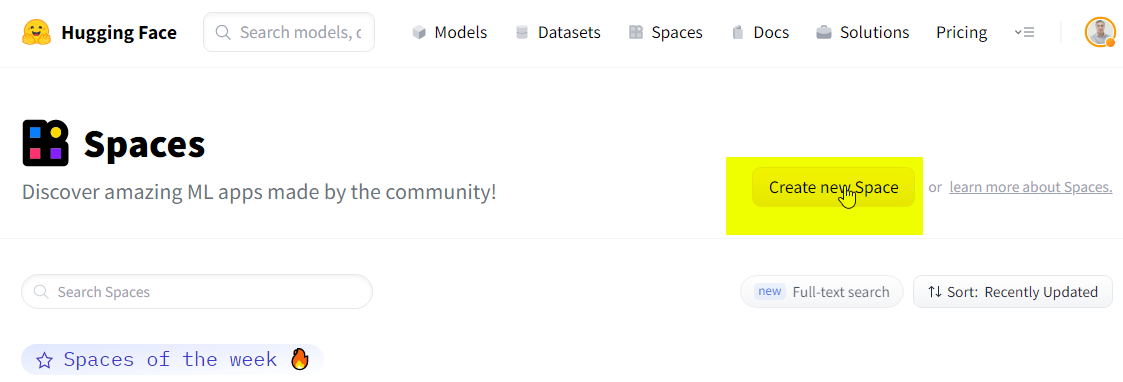

Then, create your space by filling in the form

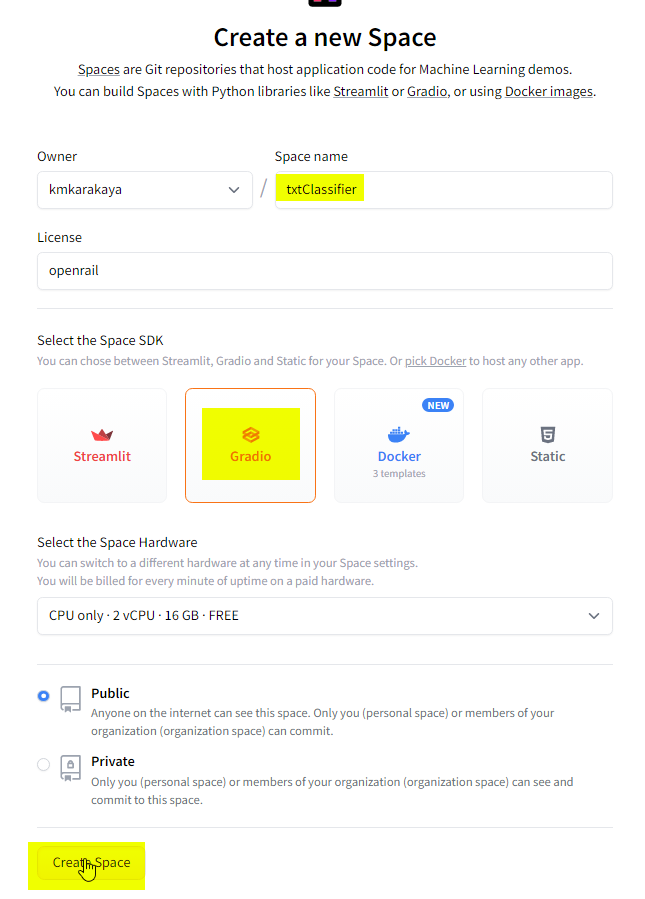

Click the ***FILES*** menu

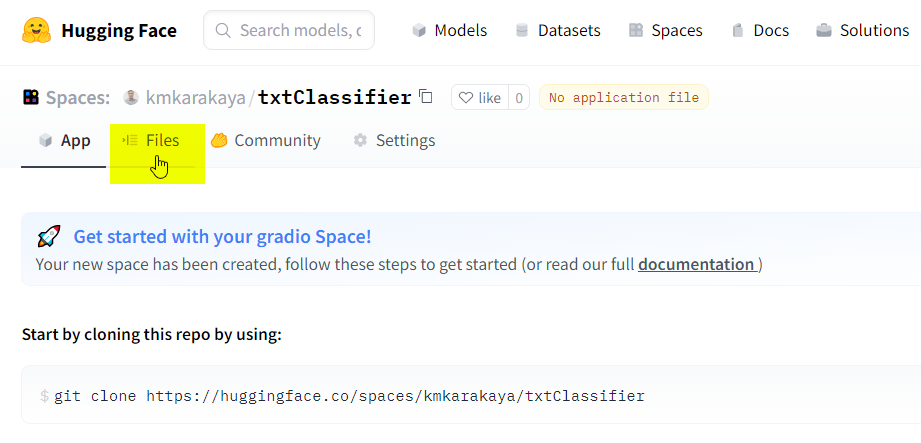

Continue with creating new file option. We will create 2 important files. 

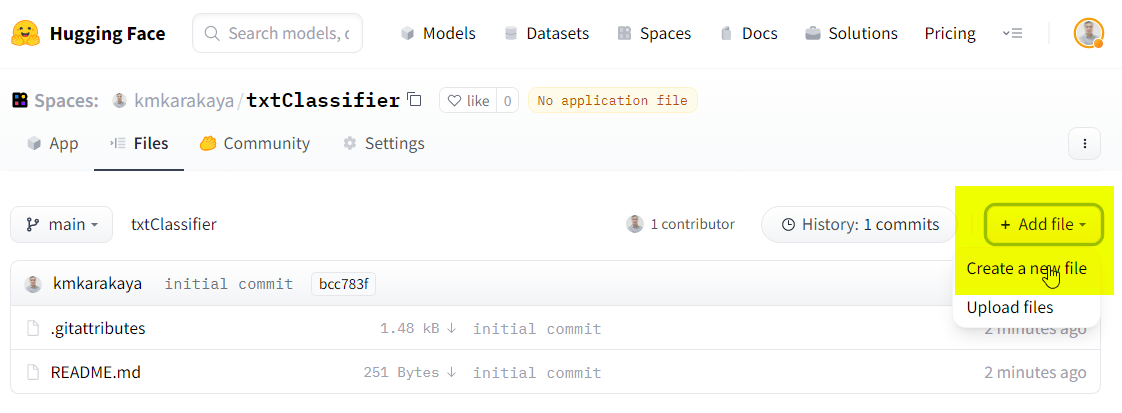

1. ***requirements.txt***: It will include all the necessary libraries to run our code.

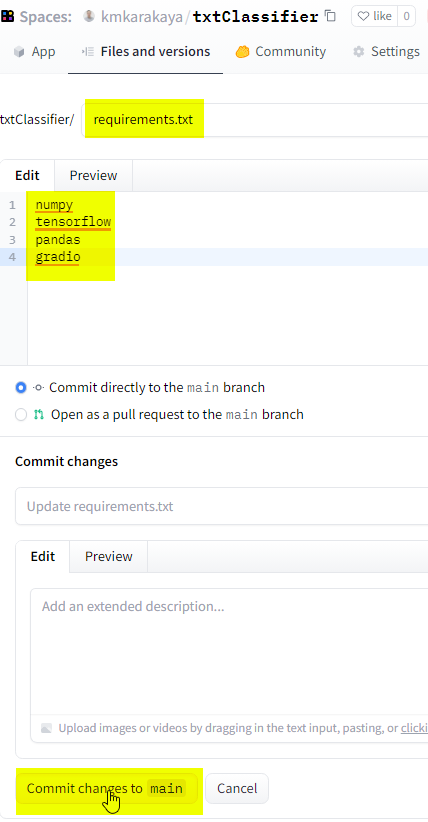

2. ***app.py***: It will include all our above code.

```
import numpy as np 
import tensorflow as tf
import pickle
import string
import pandas as pd
import gradio as gr

tr_stop_words = pd.read_csv('tr_stop_word.txt',header=None)

@tf.keras.utils.register_keras_serializable()
def custom_standardization(input_string):
    """ Remove html line-break tags and handle punctuation """
    no_uppercased = tf.strings.lower(input_string, encoding='utf-8')
    no_stars = tf.strings.regex_replace(no_uppercased, "\*", " ")
    no_repeats = tf.strings.regex_replace(no_stars, "devamını oku", "")    
    no_html = tf.strings.regex_replace(no_repeats, "<br />", "")
    no_digits = tf.strings.regex_replace(no_html, "\w*\d\w*","")
    no_punctuations = tf.strings.regex_replace(no_digits, f"([{string.punctuation}])", r" ")
    #remove stop words
    no_stop_words = ' '+no_punctuations+ ' '
    for each in tr_stop_words.values:
      no_stop_words = tf.strings.regex_replace(no_stop_words, ' '+each[0]+' ' , r" ")
    no_extra_space = tf.strings.regex_replace(no_stop_words, " +"," ")
    #remove Turkish chars
    no_I = tf.strings.regex_replace(no_extra_space, "ı","i")
    no_O = tf.strings.regex_replace(no_I, "ö","o")
    no_C = tf.strings.regex_replace(no_O, "ç","c")
    no_S = tf.strings.regex_replace(no_C, "ş","s")
    no_G = tf.strings.regex_replace(no_S, "ğ","g")
    no_U = tf.strings.regex_replace(no_G, "ü","u")
    return no_U

loaded_end_to_end_model = tf.keras.models.load_model("end_to_end_model")

pkl_file = open("id_to_category.pkl", "rb")
id_to_category = pickle.load(pkl_file)

def classify (text):
  pred=loaded_end_to_end_model.predict([text])
  return id_to_category[np.argmax(pred)]

examples=['Dün aldığım samsung telefon bugün şarj tutmuyor',
          'THY Uçak biletimi değiştirmek için başvurdum.  Kimse geri dönüş yapmadı!']

iface = gr.Interface(fn=classify, inputs="text", outputs="text", examples=examples)
iface.launch()
```

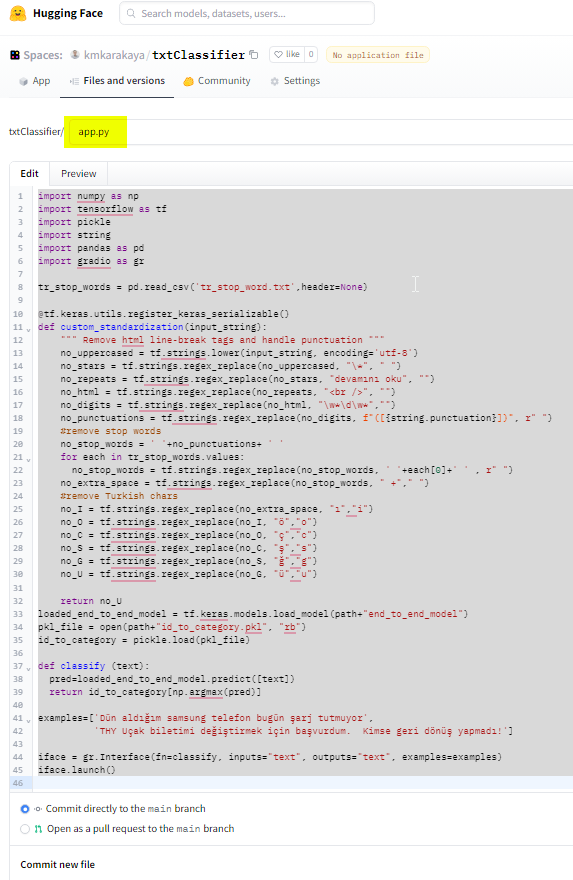

3. Lastly, we need to upload all the necessary files:
* stop words
*  id to category
*  end-to-end model.

You can drag and drop these files over the browser.

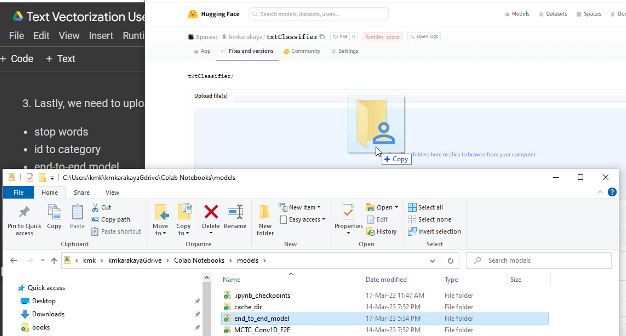

Do not forget to commit after you upload files and folders.

Notice that each time you commit a change, the system will build the service automatically:

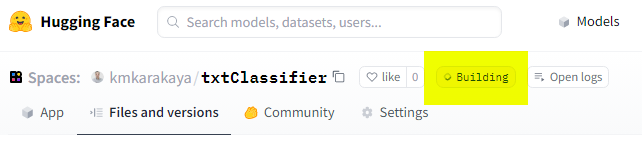

You can observe the logs to monitor installations or locate any possible error mesages, if any.

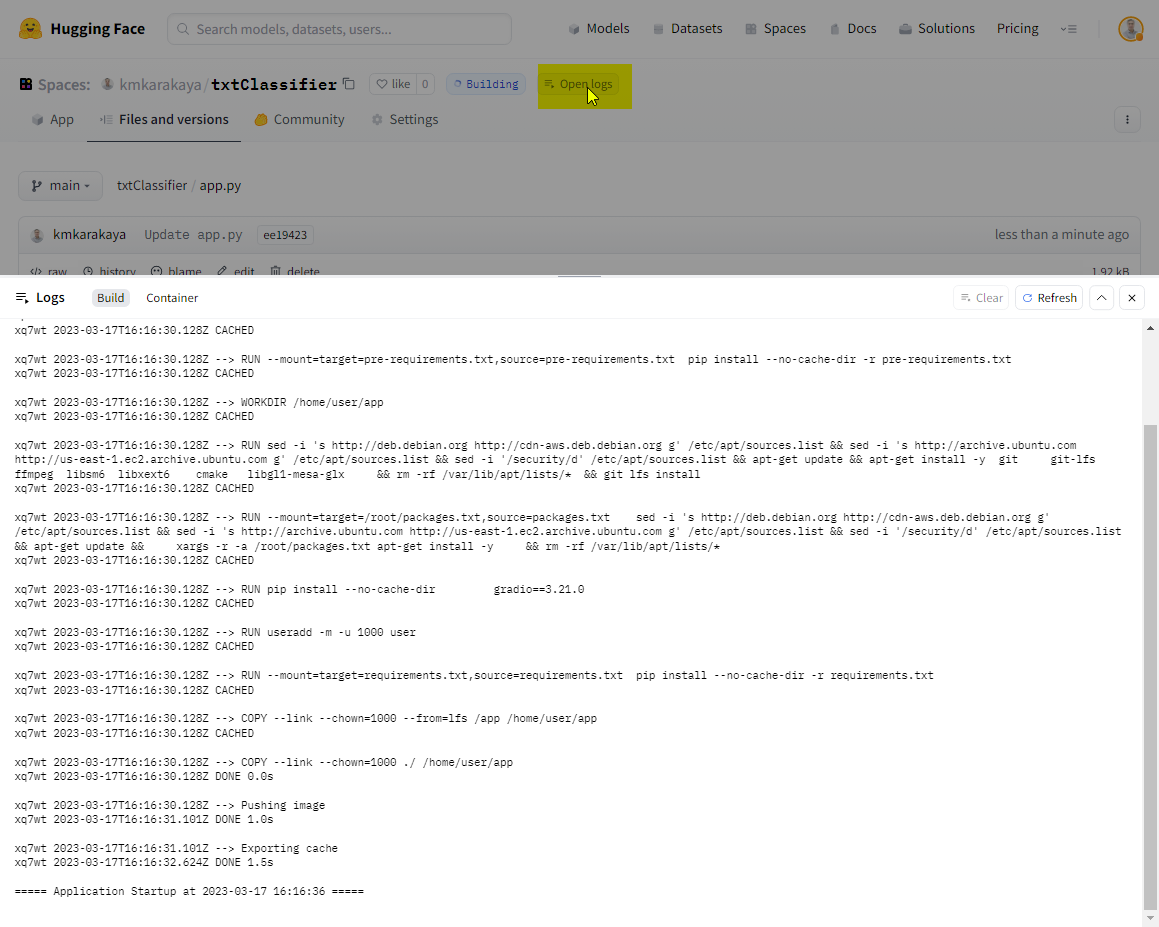

When there are no errors, you will see the ***Running*** message. You can click the ***App*** button to interact with your model via the gradio interface. Well done!

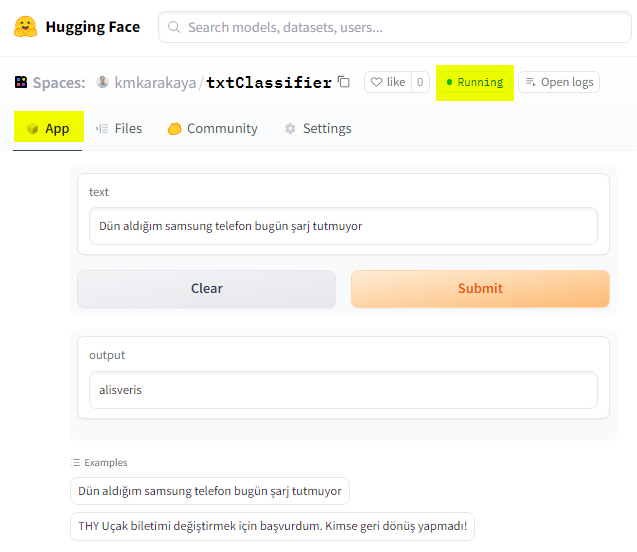

# **SUMMARY**
In this tutorial, we have learned:
* What a Keras `TextVectorization` layer is
* Why we need to use a Keras `TextVectorization` layer in Natural Languge Processing (NLP) tasks
* How to employ a Keras `TextVectorization` layer in Text Preprocessing
* How to integrate a Keras `TextVectorization` layer to a trained model
* How to save and upload a Keras `TextVectorization` layer and a model with a Keras `TextVectorization` layer
* How to integrate a Keras `TextVectorization` layer with TensorFlow Data Pipeline API (`tf.data`)
* How to design, train, save, and load an End-to-End model using Keras `TextVectorization` layer
* How to deploy the End-to-End model with a Keras `TextVectorization` layer implemented with a custom standardize (`custom_standardization`) function. 
* How to use the `Gradio` library and the `HuggingFace Spaces` platform.

All above topics are presented in a **multi-class text classification** context.

If you like this tutorial, please follow the Murat Karakaya Akademi [YouTube channel](https://www.youtube.com/c/MuratKarakayaAkademi) and [Medium blog](https://kmkarakaya.medium.com/).

**Thank you for your patience!**

#Keep Deep Learning :)